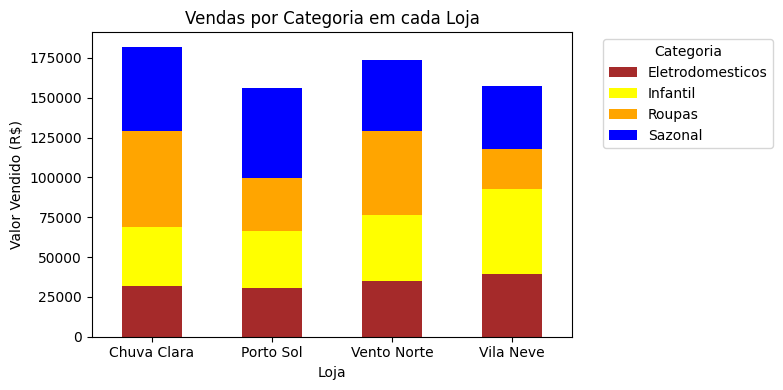

In [27]:
import pandas as pd

# Iniciar importando os dados da planilha:

df = pd.read_excel('vendas_tratadas.xlsx')
#print(df.isnull)
#print(df)

# 1. Total de vendas por loja - Agrupar por loja e somar o valor total vendido 
vendas_por_loja = df.groupby('Loja')['Valor_Venda'].sum().reset_index()
vendas_por_loja = vendas_por_loja.sort_values(by='Valor_Venda', ascending=False)
#print(vendas_por_loja)
# O reset_index() faz com que essa coluna volte a ser uma coluna comum, e o índice numérico padrão (0, 1, 2, ...) seja restaurado.
# Aproveitei e acrescentei um ordenamento decrescente.

# 2. Evolução mensal de vendas -  Identificar sazonalidades e picos mensais.
# 3. Agrupar por mês e somar vendas (juntei os dois exercícios, pois são complementares)
df['AnoMes'] = df['Data'].dt.to_period('M')
vendas_mensais = df.groupby('AnoMes')['Valor_Venda'].sum().reset_index()
vendas_mensais['AnoMes'] = vendas_mensais['AnoMes'].astype(str)  # facilita na hora de plotar
vendas_mensais = vendas_mensais.sort_values(by='Valor_Venda', ascending=False)  # ordena do maior para o menor
#print(vendas_mensais)
# O mês de maior venda foi março, enquanto os meses de fev, abr e dezembro apresentaram sazonalidades para baixo.

# 4. Produtos mais vendidos (por volume) Objetivo: saber o que mais sai no caixa.
mais_vendidos = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).reset_index()
#print(mais_vendidos.head(10)) # Trazendo os 10 primeiros colocados

# 5. Comparação entre categorias. Objetivo: analisar quais categorias são mais lucrativas.
lucro_por_categoria = df.groupby('Categoria')['Valor_Venda'].sum().sort_values(ascending=False).reset_index()
#print(lucro_por_categoria)

# 6. Comparação entre lojas por categoria. Objetivo: avaliar se há especialização ou foco
# diferente entre as lojas, com base nas categorias que mais vendem.
vendas_loja_categoria = df.groupby(['Categoria', 'Loja'])['Valor_Venda'].sum().reset_index()
vendas_loja_categoria = vendas_loja_categoria.sort_values(by=['Categoria', 'Valor_Venda'], ascending=[True, False])
#print(vendas_loja_categoria)

# 7. Plotar como gráfico de barras empilhadas
import matplotlib.pyplot as plt

pivot = vendas_loja_categoria.pivot(index='Loja', columns='Categoria', values='Valor_Venda')
pivot.fillna(0, inplace=True)
cores = ['brown', 'yellow', 'orange', 'blue']
pivot.plot(kind='bar', stacked=True, figsize=(8, 4), color=cores)
plt.xticks(rotation=0)
plt.title('Vendas por Categoria em cada Loja')
plt.xlabel('Loja')
plt.ylabel('Valor Vendido (R$)')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()